In [1]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

ModuleNotFoundError: No module named 'missingno'

In [3]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [51]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import missingno as msno

In [52]:
df = pd.read_csv('pp3.csv')
df.head()

,YEAR,TYPE,INDICATOR,PERCENT
0,2008,Convenience Store,Tobacco Advertisements Near Candy,0
1,2008,Convenience Store,Tobacco Advertisements Below Three Feet,15.8
2,2008,Gas Only,Tobacco Advertisements Below Three Feet,10
3,2008,Gas Only,Tobacco Advertisements Near Candy,0
4,2008,Liquor Store,Tobacco Advertisements Below Three Feet,12.7


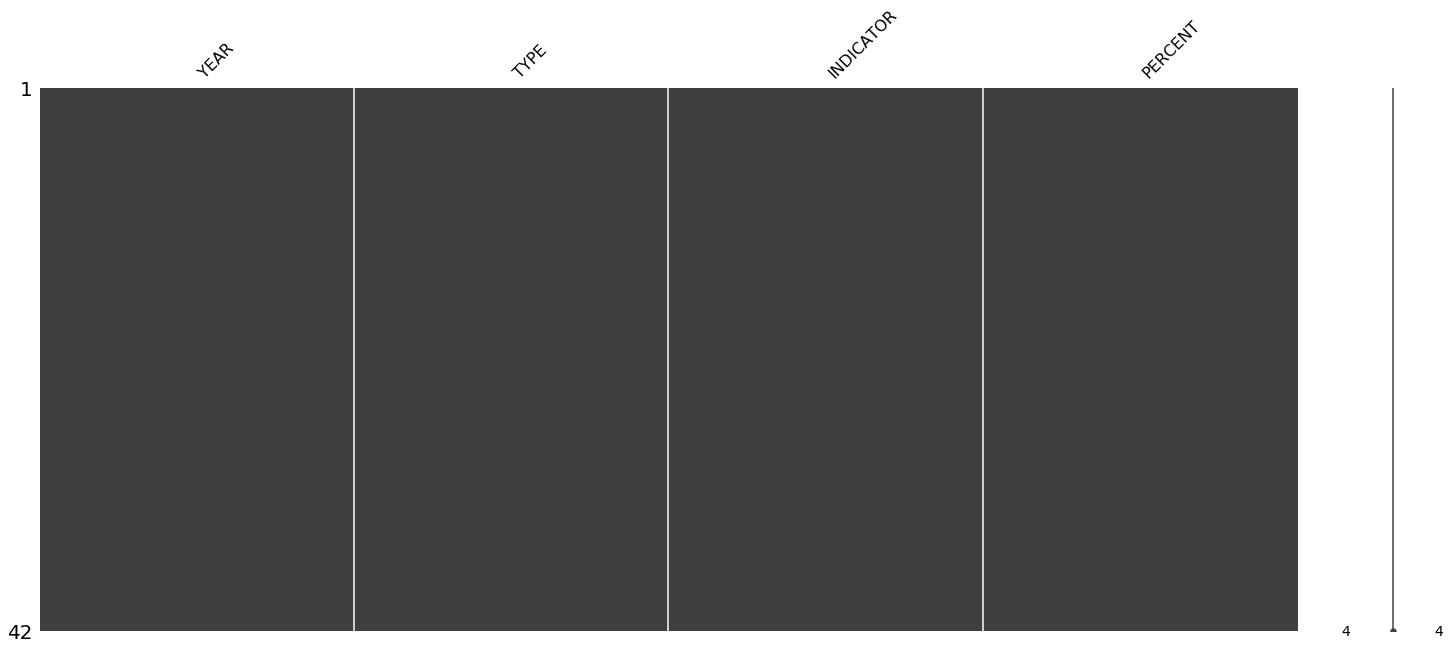

In [53]:
msno.matrix(df)

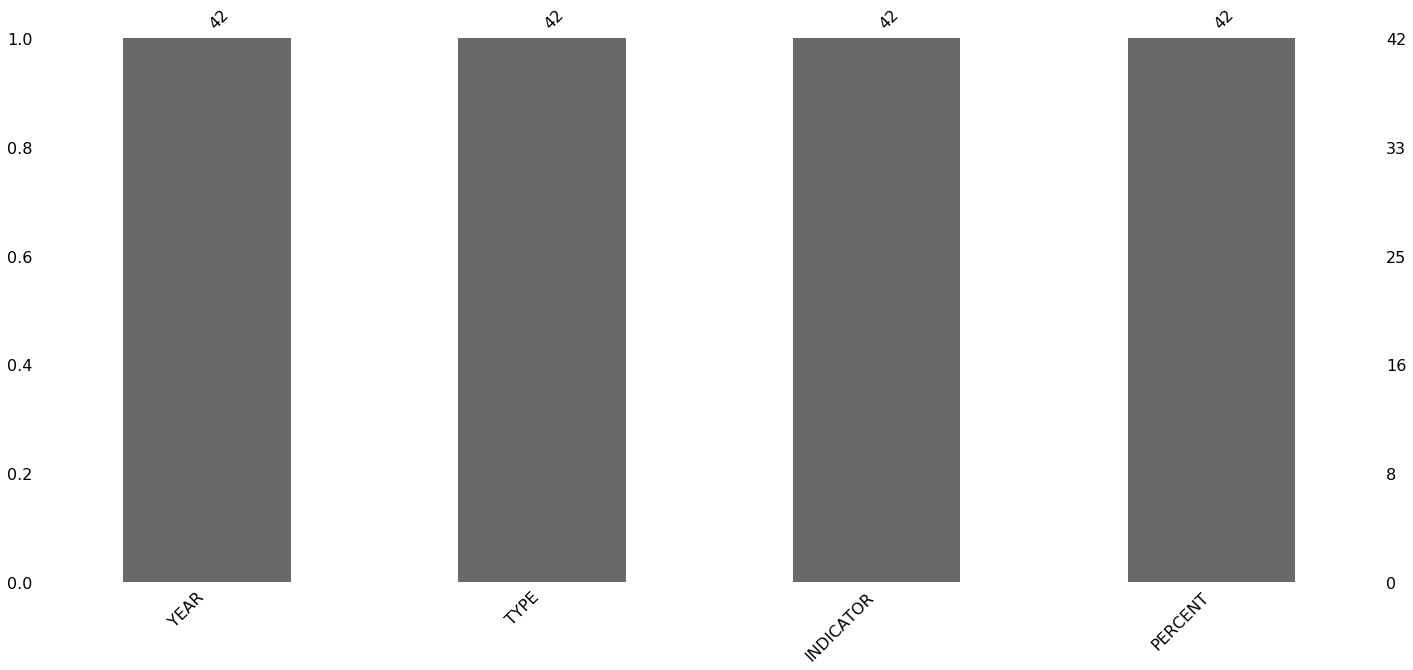

In [54]:
msno.bar(df)

In [68]:
items = (df['TYPE'].unique())
items

array(['Convenience Store', 'Gas Only', 'Liquor Store', 'Pharmacy',
       'Small Market', 'Supermarket', 'Total'], dtype=object)

In [69]:
encoded_vals = []

for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)

In [70]:
ohe_df = pd.DataFrame(encoded_vals)
ohe_df.head()

,Liquor Store,Total,Pharmacy,Supermarket,Small Market,Gas Only,Convenience Store
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0


In [71]:
freq_items = apriori(ohe_df, min_support=0.1, use_colnames=True, verbose=1)
freq_items.head()

Processing 42 combinations | Sampling itemset size 2


,support,itemsets
0,0.142857,(Liquor Store)
1,0.142857,(Total)
2,0.142857,(Pharmacy)
3,0.142857,(Supermarket)
4,0.142857,(Small Market)


In [72]:
freq_items.itemsets.unique()

array([frozenset({'Liquor Store'}), frozenset({'Total'}),
       frozenset({'Pharmacy'}), frozenset({'Supermarket'}),
       frozenset({'Small Market'}), frozenset({'Gas Only'}),
       frozenset({'Convenience Store'})], dtype=object)

In [82]:
rules = association_rules(freq_items, min_threshold=0.6)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
